In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii2.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine,reflect=True)


In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement_class = base.classes.measurement
station_class = base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement_class.date)).first()

print(recent_date)

('2017-08-23',)


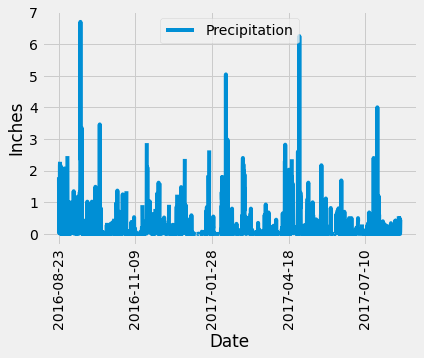

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_12months = dt.date(2017,8,23)-dt.timedelta(days=365)
#print(last_12months)

# Perform a query to retrieve the data and precipitation scores
last_12Precip = session.query(measurement_class.date, measurement_class.prcp).filter(measurement_class.date >= last_12months).all()
#print(last_12Precip)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_12df = pd.DataFrame(last_12Precip, columns=['Date', 'Precipitation'])
#last_12df.head()

# Sort the dataframe by date
datedf_sorted = last_12df.sort_values('Date')
datedf_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data
datedf_sorted.plot(x='Date', y='Precipitation', rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
datedf_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station_class.station).count()

print(total_stations)

9


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
max_stations = session.query(measurement_class.station, func.count(measurement_class.station)).group_by(measurement_class.station).order_by(func.count(measurement_class.station).desc()).all()
print(max_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_max = max_stations[0][0]
print(active_max)

active_low = session.query(func.min(measurement_class.tobs)).filter(measurement_class.station == active_max).all()
print(active_low)

active_high = session.query(func.max(measurement_class.tobs)).filter(measurement_class.station == active_max).all()
print(active_high)
active_avg = session.query(func.avg(measurement_class.tobs)).filter(measurement_class.station == active_max).all()
print(active_avg)

USC00519281
[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [60]:
# Using the most active station id
active_max = max_stations[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12months = dt.date(2017,8,23)-dt.timedelta(days=365)
last_12_temp = session.query(measurement_class.station, measurement_class.tobs).filter(measurement_class.date >= last_12months).all()
#print(last_12_temp)

#dateframe for plotting
temp_df = pd.DataFrame(last_12_temp, columns=['Station id', 'Temperature'])
temp_df.head()


,Station id,Temperature
0,USC00519397,81.0
1,USC00519397,79.0
2,USC00519397,80.0
3,USC00519397,79.0
4,USC00519397,77.0


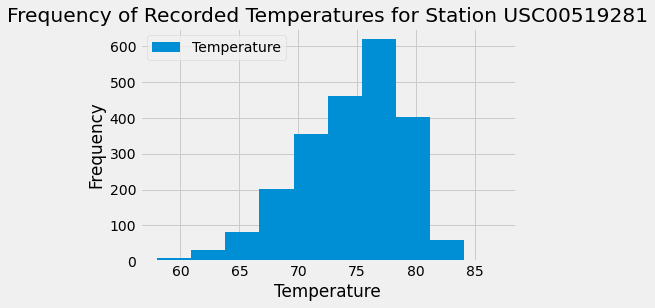

In [79]:
#plot histogram
temp_df.plot.hist(by=active_max)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency of Recorded Temperatures for Station USC00519281')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()